# Importing Libraries

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Reading the dataset

In [222]:
df = pd.read_csv('heart.csv')

# Exploring the dataset

In [223]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [225]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Generating Heatmap to find relation between different features

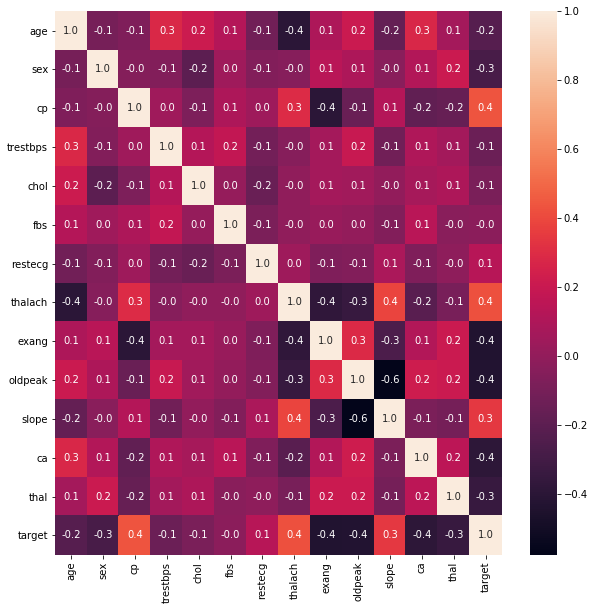

In [226]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True , fmt = '0.1f')
plt.show()

# Drawing a bar graph for age analysis

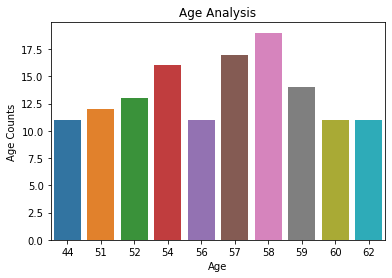

In [227]:
sns.barplot(x=df.age.value_counts()[:10].index ,y = df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counts')
plt.title('Age Analysis')
plt.show()

# Counting Number of Patient with and without Disease

In [228]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [229]:
countNoDisease = df[df['target'] == 0]
countHaveDisease = df[df['target'] == 1]
print('Percentage of patients dont have heart disease: {:.2f}%'.format((len(countNoDisease)/len(df.target))*100))
print('Percentage of patients have heart disease: {:.2f}%'.format((len(countHaveDisease)/len(df.target))*100))

Percentage of patients dont have heart disease: 45.54%
Percentage of patients have heart disease: 54.46%


# Counting Patient with different sexes

In [230]:
countFemale = len(df[df['sex'] == 0])
countMale = len(df[df['sex'] == 1])
print("Percentage of female patients: {:.2f}%".format(countFemale/(len(df.sex))*100))
print("Percentage of male patients: {:.2f}%".format(countMale/(len(df.sex))*100))

Percentage of female patients: 31.68%
Percentage of male patients: 68.32%


# Counting Patients in different Age Groups

In [231]:
young_ages = df[(df.age>=29)&(df.age<40)]
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]
print("Young ages :" ,len(young_ages))
print("Middle ages :" ,len(middle_ages))
print("Elderly ages :" ,len(elderly_ages))

Young ages : 16
Middle ages : 128
Elderly ages : 159


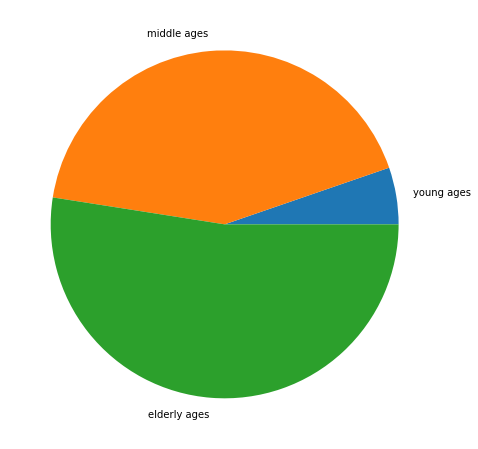

In [232]:
colors = ['blue','green','red']
explode = [0.1,0.1,0.1]
plt.figure(figsize = (8,8))
plt.pie([len(young_ages) , len(middle_ages) , len(elderly_ages)],labels = ['young ages','middle ages','elderly ages'])
plt.show()

# Analysing people with chestpain as it had postive correlation with target

In [233]:
#chest pain analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

# Building the models

## Splitting the dataset

In [234]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 2018)

# Importing necessary libraries 

In [245]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
%matplotlib inline

# Standardize the data

In [246]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Training the model using SVC , KNN , Decision Tree with Adaboost and MultiLayer Perceptron  

In [247]:
svm_clf = SVC(kernel='rbf' , gamma = 0.001 , C = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy' , random_state = 2018)
ada = AdaBoostClassifier(base_estimator = dt , n_estimators = 1000 , learning_rate = 0.1 , random_state = 2018)
mlp = MLPClassifier(activation = 'logistic' , solver = 'sgd' , learning_rate_init = 0.001 , learning_rate = 'constant' , alpha = 1e-4 , hidden_layer_sizes = (100,) , max_iter = 5000 , shuffle = True , random_state = 2018 )

In [248]:
svm_clf.fit(X_train_std , Y_train)
knn_clf.fit(X_train_std , Y_train)
ada.fit(X_train_std , Y_train)
mlp.fit(X_train_std , Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2018, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [249]:
svm_pred = svm_clf.predict(X_test_std)
knn_pred = knn_clf.predict(X_test_std)
ada_pred = ada.predict(X_test_std)
mlp_pred = mlp.predict(X_test_std)

# Finding the accuracy score 

In [250]:
print("Accuracy Score SVM" , accuracy_score(Y_test , svm_pred))
print("Accuracy Score KNN" , accuracy_score(Y_test , knn_pred))
print("Accuracy Score AdaBoost" , accuracy_score(Y_test , ada_pred))
print("Accuracy Score MLP" , accuracy_score(Y_test , mlp_pred))

Accuracy Score SVM 0.8681318681318682
Accuracy Score KNN 0.8571428571428571
Accuracy Score AdaBoost 0.8351648351648352
Accuracy Score MLP 0.8901098901098901


## Multilayer perceptron gives the best accuracy with 89.01%

# Finding the best value of k in KNN

In [252]:
knn_scores = []
for k in range(1,100):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

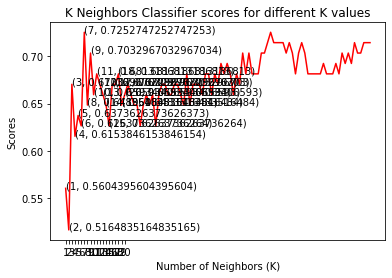

In [253]:
plt.plot([k for k in range(1, 100)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

# For k=7 KNN gives best result

In [254]:
knn1_clf = KNeighborsClassifier(n_neighbors = 7)
knn1_clf.fit(X_train_std , Y_train)
knn1_pred = knn1_clf.predict(X_test_std)
print(X_test_std)
print(Y_test)
print(knn1_pred)
print("Accuracy Score KNN with best parameters " , accuracy_score(Y_test , knn1_pred))
print(classification_report(Y_test , knn1_pred))
print(confusion_matrix(Y_test , knn1_pred))

[[ 0.50919237  0.62828086 -0.96007246 ... -0.64481033  1.20712976
  -2.2326756 ]
 [ 1.06909269 -1.59164485  0.96007246 ...  1.02226028 -0.74639321
   1.04294535]
 [ 0.28523224  0.62828086  0.96007246 ...  1.02226028 -0.74639321
  -0.59486513]
 ...
 [-1.28248866 -1.59164485 -0.96007246 ... -0.64481033 -0.74639321
   1.04294535]
 [-1.39446873  0.62828086  0.         ...  1.02226028 -0.74639321
  -0.59486513]
 [-1.1705086   0.62828086 -0.96007246 ...  1.02226028  0.23036828
  -0.59486513]]
[0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0]
[0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0]
Accuracy Score KNN with best parameters  0.9120879120879121
              precision    recall  f1-score   support

           0       0.

In [275]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

# rf = RandomForestClassifier(random_state=best_x)
# rf.fit(X_train,Y_train)
# Y_pred_rf = rf.predict(X_test)

92.31
682


In [276]:
rf = RandomForestClassifier(random_state=682)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [277]:
print("Accuracy Score RandomForest with best parameters " , accuracy_score(Y_test , Y_pred_rf))
print(classification_report(Y_test , Y_pred_rf))
print(confusion_matrix(Y_test , Y_pred_rf))

Accuracy Score RandomForest with best parameters  0.9230769230769231
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.93      0.95      0.94        56

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91

[[31  4]
 [ 3 53]]


In [278]:
from sklearn.externals import joblib
joblib.dump(rf,'ModelForHeartDiseasePrediction2.pkl')

['ModelForHeartDiseasePrediction2.pkl']

In [287]:
testDtaa = pd.DataFrame({'x':X.iloc[167]}).transpose()
modelReload=joblib.load('ModelForHeartDiseasePrediction2.pkl')
modelReload.predict(testDtaa)[0]

0